# Dataset

In [ ]:
import os
import zipfile
from tensorflow import keras

# Download and unzip dataset
dataset_url = "https://github.com/alex-s-888/Blurry-Image-Detection/raw/refs/heads/main/dataset/blur-noblur.zip"
zip_file_path = keras.utils.get_file(origin=dataset_url, extract=False)
zip_ref = zipfile.ZipFile(zip_file_path, 'r')
# Extract to same name without the .zip extension
extract_dir = os.path.splitext(zip_file_path)[0]
# Extract the files
zip_ref.extractall(extract_dir)
zip_ref.close()

# Print the path to the extracted files
# print(f"Dataset extracted to: {extract_dir}")

# Samples of images in dataset

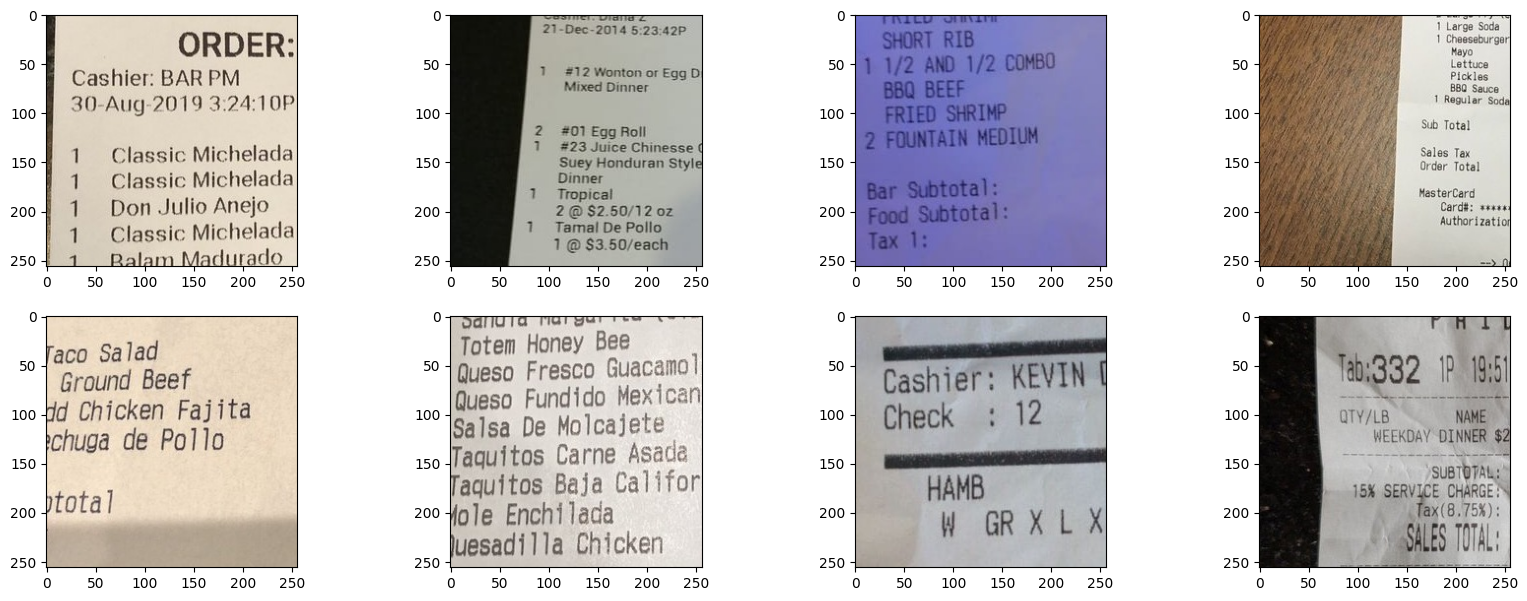

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Samples of non-blurred images

images = []
for img_path in glob.glob(extract_dir + '/train/noblur/*.jpg'):
    images.append(mpimg.imread(img_path))
    if len(images) > 7:
        break

fig = plt.figure(figsize=(20, 15))
columns = 4
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1) + 1, columns, i + 1)
    plt.imshow(image)


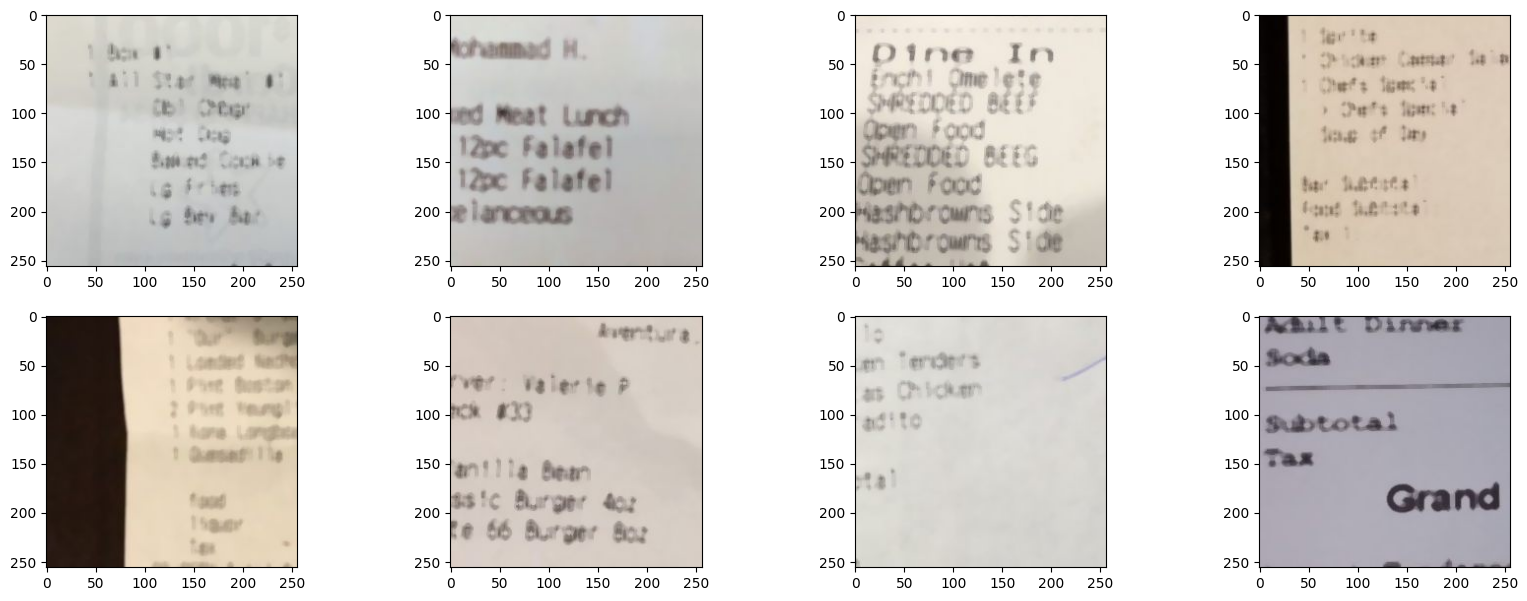

In [ ]:
# Samples of blurred images

images = []
for img_path in glob.glob(extract_dir + '/train/blurred/*.jpg'):
    images.append(mpimg.imread(img_path))
    if len(images) > 7:
        break

fig = plt.figure(figsize=(20, 15))
columns = 4
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1) + 1, columns, i + 1)
    plt.imshow(image)

# Build the model

Using ImageDataGenerator.flow_from_directory() to read images while model is being trained

In [ ]:
BATCH_SIZE = 24

img_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

train_ds = img_gen.flow_from_directory(
    extract_dir + '/train',
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical'
)

Found 240 images belonging to 2 classes.


In [ ]:
train_ds.class_indices


{'blurred': 0, 'noblur': 1}

In [ ]:
val_ds = img_gen.flow_from_directory(
    extract_dir + '/validation',
    batch_size=BATCH_SIZE,
    shuffle=False,
    class_mode='categorical'
)

Found 48 images belonging to 2 classes.


In [ ]:
val_ds.class_indices

{'blurred': 0, 'noblur': 1}

Determine best learning rate

In [ ]:
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

def prepare_model(learning_rate=0.001, dropout = 0.2):
  model = Sequential()

  model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)))
  model.add(MaxPooling2D())
  model.add(Conv2D(32, 3, padding='same', activation='relu'))
  model.add(MaxPooling2D())
  model.add(Conv2D(64, 3, padding='same', activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  if dropout > 0:
    model.add(Dropout(dropout))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(2, activation='softmax'))

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
  )

  return model


In [ ]:
EPOCHS = 12

all_histories = {}

for learning_rate in [0.0001, 0.0003, 0.001, 0.003]:
  print(f"---- Doing with learning_rate = {learning_rate}")
  model = prepare_model(learning_rate = learning_rate)
  history = model.fit(
      train_ds,
      epochs=EPOCHS,
      validation_data=val_ds
  )
  all_histories[learning_rate] = history.history


---- Doing with learning_rate = 0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5267 - loss: 0.7353 - val_accuracy: 0.5000 - val_loss: 0.6724
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5503 - loss: 0.6661 - val_accuracy: 0.6667 - val_loss: 0.6218
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6382 - loss: 0.5975 - val_accuracy: 0.6250 - val_loss: 0.6022
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6644 - loss: 0.5878 - val_accuracy: 0.6250 - val_loss: 0.5504
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8471 - loss: 0.4324 - val_accuracy: 0.8958 - val_loss: 0.3964
Epoch 6/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8979 - loss: 0.3743 - val_accuracy: 0.8958 - val_loss: 0.3071
Epoch 7/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9332 - loss: 0.2706 - val_accuracy: 0.9583 - val_loss: 0.2332
Epoch 8/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9241 - loss: 0.2323 - val_accuracy: 0.9583 - val_loss: 0.1793
Epo

Visualize Accuracy and Loss for different learning rates

In [ ]:
import matplotlib.pyplot as plt

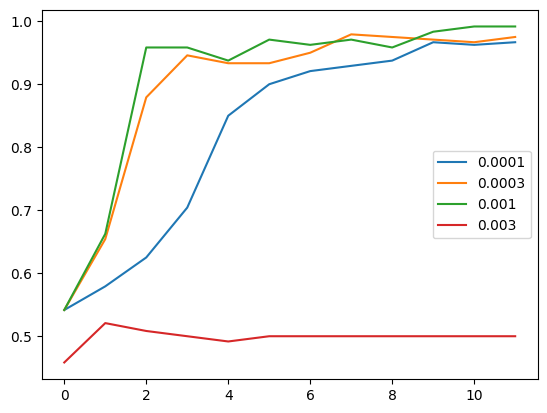

In [ ]:
# Accuracy

for lr, hist in all_histories.items():
  plt.plot(
      hist['accuracy'],
      label=lr
  )
plt.legend()

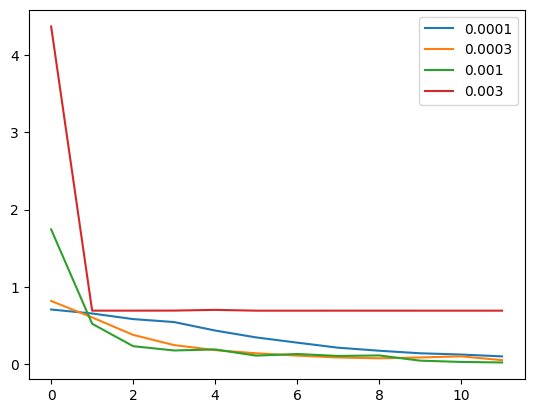

In [ ]:
# Loss

for lr, hist in all_histories.items():
  plt.plot(
      hist['loss'],
      label=lr
  )
plt.legend()

Build the model with optimal learning rate and save as .tflite file

In [ ]:
# Best learning_rate is 0.001, build the model

model = prepare_model(learning_rate=0.001)

history = model.fit(
  train_ds,
  epochs=EPOCHS,
  validation_data=val_ds
)

Epoch 1/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4854 - loss: 2.7354 - val_accuracy: 0.5000 - val_loss: 0.6872
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5374 - loss: 0.6230 - val_accuracy: 0.5000 - val_loss: 0.5494
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5371 - loss: 0.5285 - val_accuracy: 0.7500 - val_loss: 0.3924
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8988 - loss: 0.3869 - val_accuracy: 0.9792 - val_loss: 0.3013
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9667 - loss: 0.2689 - val_accuracy: 0.8542 - val_loss: 0.2678
Epoch 6/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9220 - loss: 0.2905 - val_accuracy: 0.8750 - val_loss: 0.3820
Epoch 7/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9218 - loss: 0.2742 - val_accuracy: 0.9792 - val_loss: 0.1184
Epoch 8/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9633 - loss: 0.1308 - val_accuracy: 1.0000 - val_loss:

In [ ]:
import tensorflow as tf

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('mymodel.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

Saved artifact at '/tmp/tmpxu4ju5tg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_362')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  135791960959184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791961252336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791961255504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791961256560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791959448336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791959446400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791959454496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791959674896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791959675072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135791959672080: TensorSpec(shape=(), dtype=tf.resource, name=None)
